In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Load the time-series data
data = pd.read_csv('time_series_hfrs_data.csv')

In [3]:
# Convert the 'Year' column to datetime format
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

In [4]:
# Set the 'Year' column as the index
data.set_index('Year', inplace=True)

In [5]:
# Check for stationarity using Augmented Dickey-Fuller test
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t', key, ':', value)

In [6]:
print('Results of Augmented Dickey-Fuller Test:')
adf_test(data['HFRS_Incidence'])
print('\n')

Results of Augmented Dickey-Fuller Test:
ADF Statistic: -0.39027824410966466
p-value: 0.9117093521395574
Critical Values:
	 1% : -3.50434289821397
	 5% : -2.8938659630479413
	 10% : -2.5840147047458037




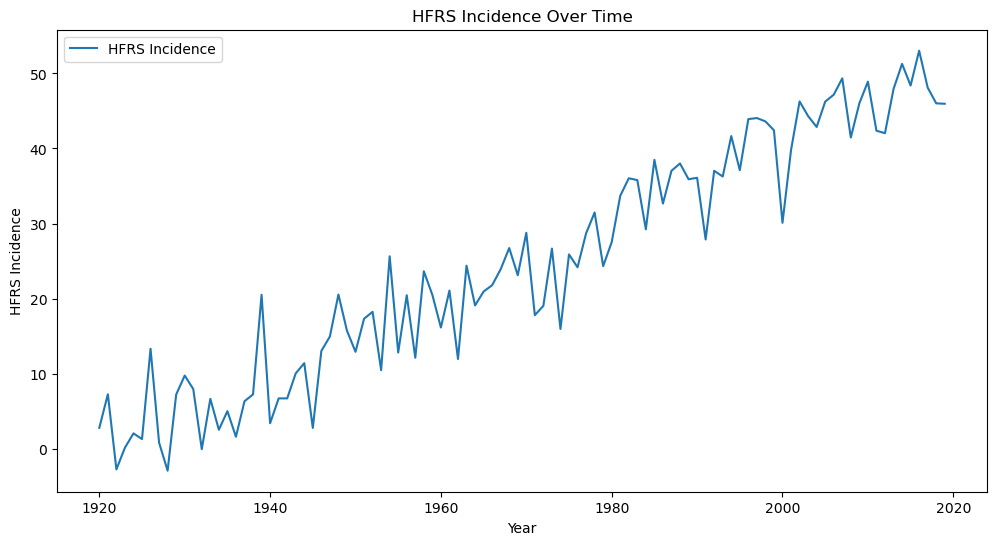

In [7]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['HFRS_Incidence'], label='HFRS Incidence')
plt.xlabel('Year')
plt.ylabel('HFRS Incidence')
plt.title('HFRS Incidence Over Time')
plt.legend()
plt.show()

In [8]:
# Decompose the time series into trend, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['HFRS_Incidence'], model='additive', period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

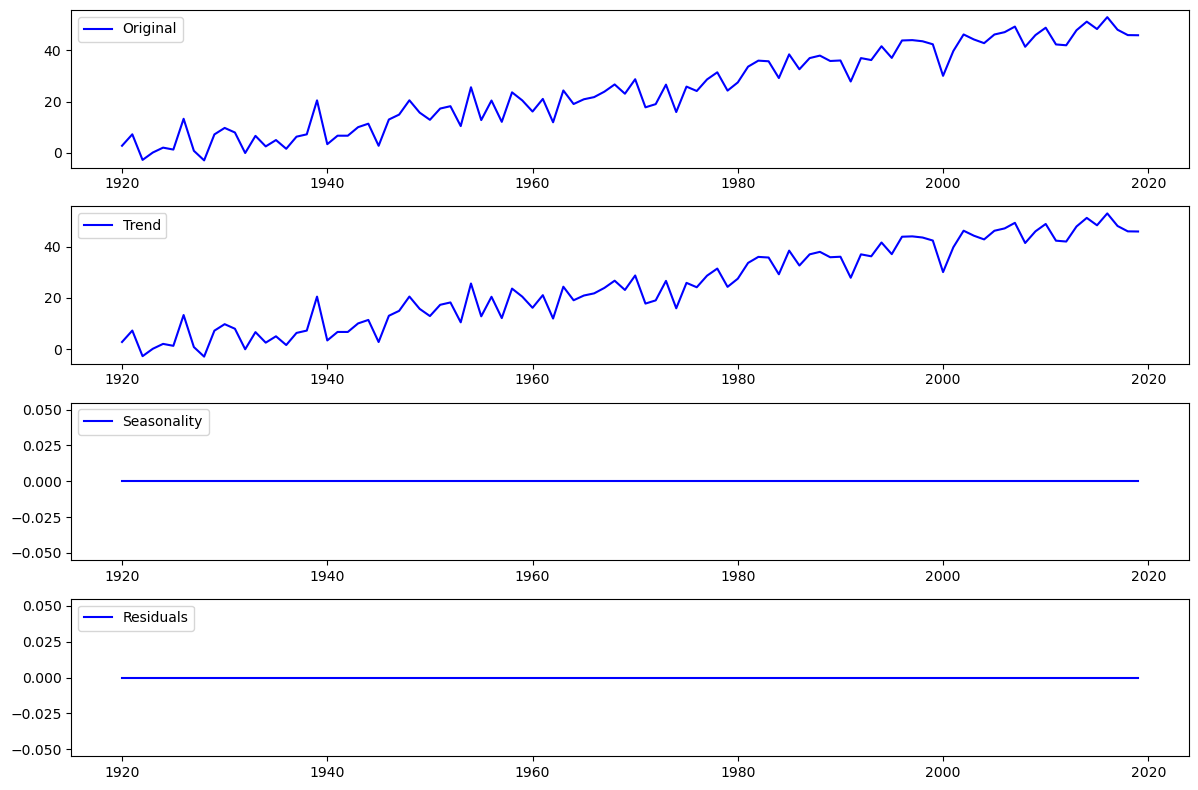

In [9]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['HFRS_Incidence'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

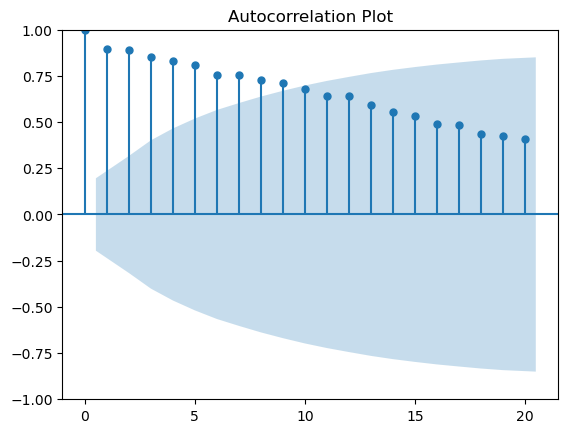

In [10]:
# Plot autocorrelation and partial autocorrelation plots
plot_acf(data['HFRS_Incidence'], lags=20)
plt.title('Autocorrelation Plot')
plt.show()

C:\Users\Amit Kumar Mishra\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


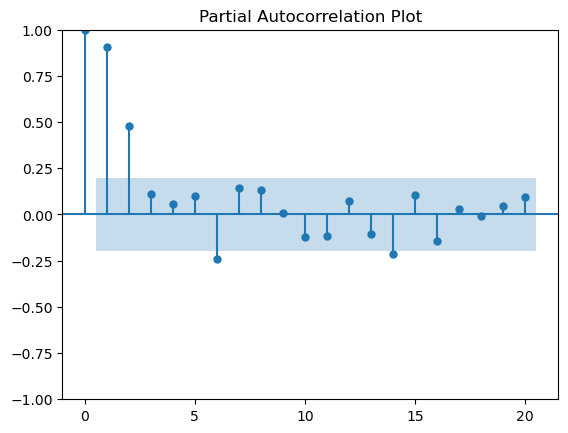

In [11]:
plot_pacf(data['HFRS_Incidence'], lags=20)
plt.title('Partial Autocorrelation Plot')
plt.show()

In [12]:
# Fit ARIMA model
model = ARIMA(data['HFRS_Incidence'], order=(1, 1, 1))
results = model.fit()

C:\Users\Amit Kumar Mishra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Amit Kumar Mishra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Amit Kumar Mishra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [13]:
# Print model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:         HFRS_Incidence   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -300.796
Date:                Fri, 23 Feb 2024   AIC                            607.593
Time:                        12:34:15   BIC                            615.378
Sample:                    01-01-1920   HQIC                           610.743
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1570      0.154     -1.023      0.306      -0.458       0.144
ma.L1         -0.6228      0.122     -5.086      0.000      -0.863      -0.383
sigma2        25.3232      3.725      6.798      0.0

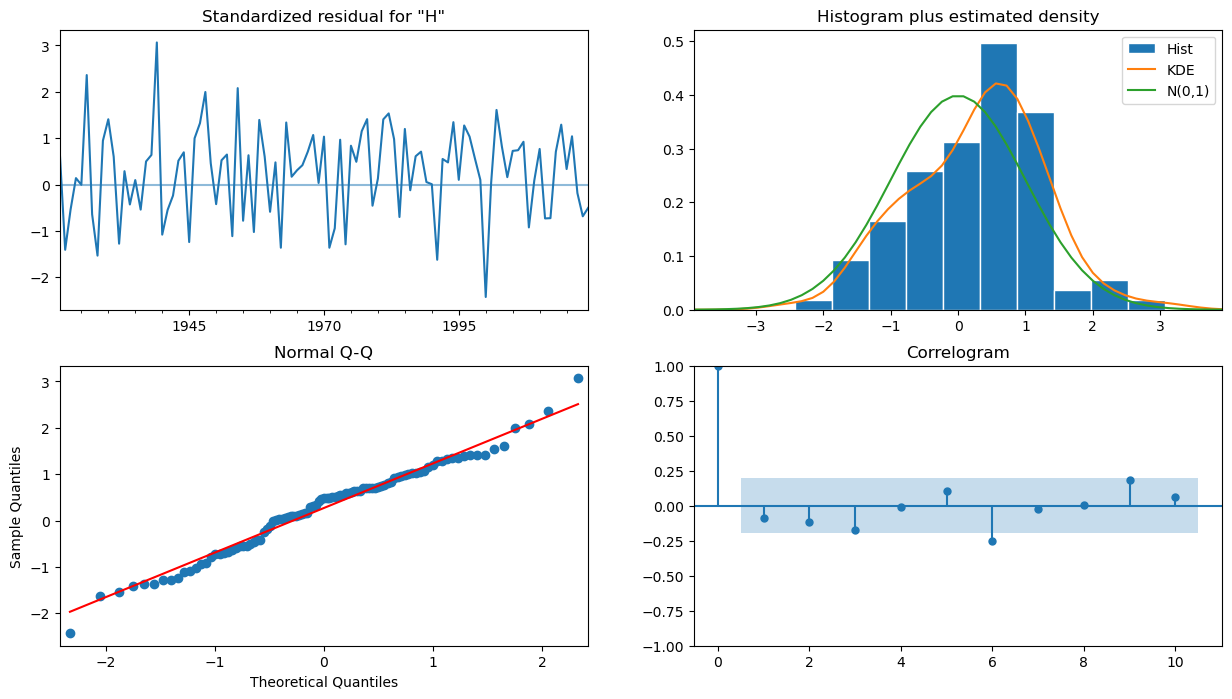

In [14]:
# Plot model diagnostics
results.plot_diagnostics(figsize=(15, 8))
plt.show()

In [18]:
# Forecast future values
forecast_steps = 15
forecast = results.forecast(steps=forecast_steps)

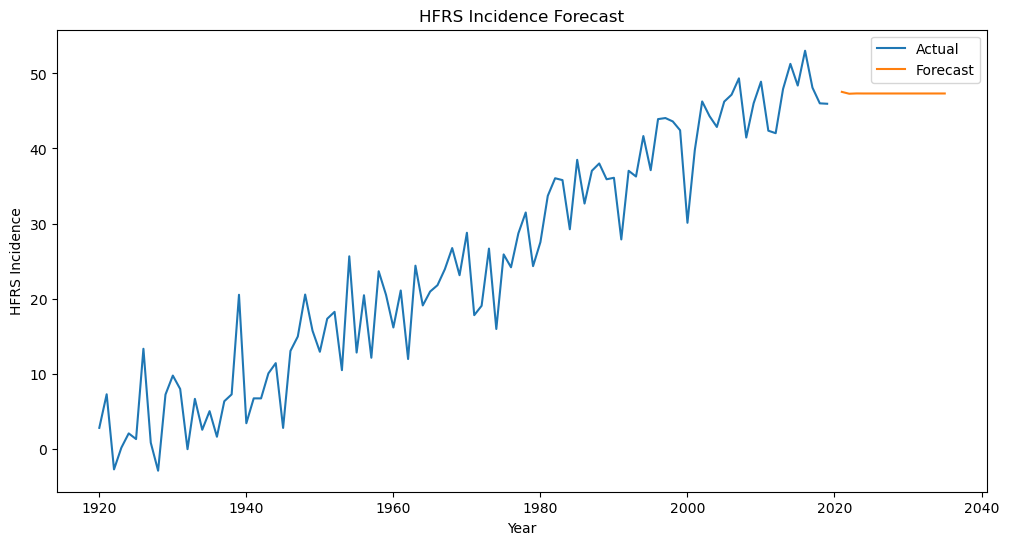

In [19]:
# Plot forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['HFRS_Incidence'], label='Actual')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='Y')[1:], forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('HFRS Incidence')
plt.title('HFRS Incidence Forecast')
plt.legend()
plt.show()


In [21]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [22]:
# Fit ARIMA model
model = ARIMA(train['HFRS_Incidence'], order=(1, 1, 1))
results = model.fit()

C:\Users\Amit Kumar Mishra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Amit Kumar Mishra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Amit Kumar Mishra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 30.675072855041755


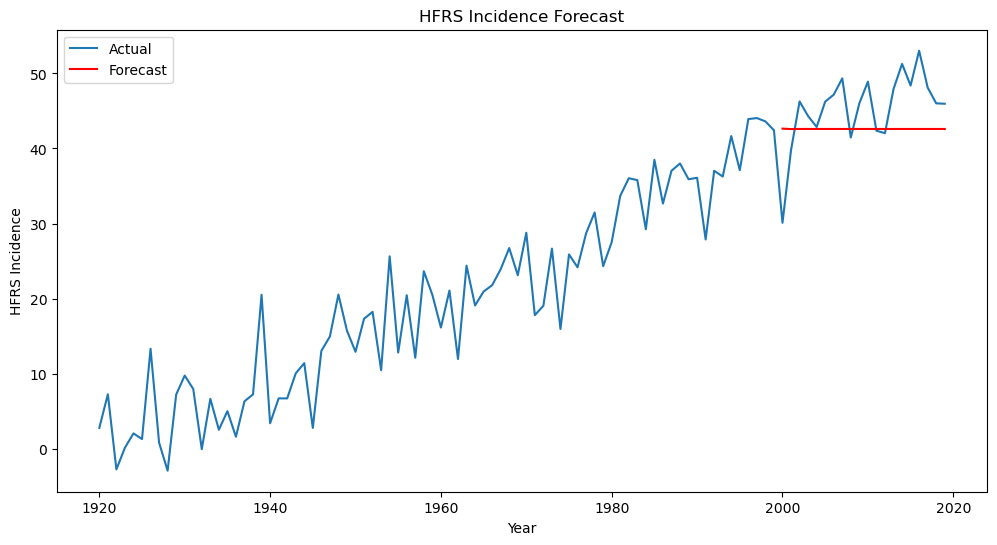

In [24]:
from sklearn.metrics import mean_squared_error 
# Make predictions
forecast_steps = 10
forecast = results.forecast(steps=forecast_steps)

# Evaluate model
predictions = results.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
mse = mean_squared_error(test['HFRS_Incidence'], predictions)
print('Mean Squared Error:', mse)

# Plot forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['HFRS_Incidence'], label='Actual')
plt.plot(predictions.index, predictions, label='Forecast', color='red')
plt.xlabel('Year')
plt.ylabel('HFRS Incidence')
plt.title('HFRS Incidence Forecast')
plt.legend()
plt.show()